In [ ]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
input_path = '../data/cleaned_data.csv'

if not os.path.exists(input_path):
    raise FileNotFoundError(f'File {input_path} không tồn tại. Hãy kiểm tra lại đường dẫn.')

In [ ]:
df = pd.read_csv(input_path, sep=',')

In [ ]:
print('\nThống kê tổng quan dữ liệu:')
print(df.describe())
print('\nSố tỉnh/thành:', df['Province_Region'].nunique())
print('Số năm:', df['Year'].nunique())
print('Có giá trị thiếu không?\n', df.isnull().sum())


Thống kê tổng quan dữ liệu:
              Year  Unemployment_Rate
count   414.000000         414.000000
mean   2020.500000           2.369831
std       1.709891           1.338043
min    2018.000000           0.080000
25%    2019.000000           1.405000
50%    2020.500000           2.185000
75%    2022.000000           3.125000
max    2023.000000           9.410000

Số tỉnh/thành: 69
Số năm: 6
Có giá trị thiếu không?
 Province_Region      0
Year                 0
Unemployment_Rate    0
dtype: int64


In [ ]:
province = 'Hà Nội'
print(f'\nBiến động tỷ lệ thất nghiệp của {province} qua các năm:')
print(df[df['Province_Region'] == province][['Year', 'Unemployment_Rate']])


Biến động tỷ lệ thất nghiệp của Hà Nội qua các năm:
    Year  Unemployment_Rate
6   2018               1.80
7   2019               1.78
8   2020               2.11
9   2021               2.68
10  2022               2.22
11  2023               2.01


In [ ]:
for year, group in df.groupby('Year'):
    print(f'\nNăm {year} - Top 5 cao nhất:')
    print(group.nlargest(5, 'Unemployment_Rate')[['Province_Region', 'Unemployment_Rate']])
    print(f'Năm {year} - Top 5 thấp nhất:')
    print(group.nsmallest(5, 'Unemployment_Rate')[['Province_Region', 'Unemployment_Rate']])


Năm 2018 - Top 5 cao nhất:
      Province_Region  Unemployment_Rate
180           Hà Tĩnh               4.97
360         Vĩnh Long               4.48
198  Thừa Thiên - Huế               4.47
204           Đà Nẵng               4.28
192         Quảng Trị               3.71
Năm 2018 - Top 5 thấp nhất:
    Province_Region  Unemployment_Rate
282        Lâm Đồng               0.08
150          Sơn La               0.23
144        Lai Châu               0.33
348         Bến Tre               0.33
78         Hà Giang               0.34

Năm 2019 - Top 5 cao nhất:
      Province_Region  Unemployment_Rate
337           Long An               5.34
199  Thừa Thiên - Huế               4.21
403          Bạc Liêu               3.74
379        Kiên Giang               3.56
205           Đà Nẵng               3.55
Năm 2019 - Top 5 thấp nhất:
    Province_Region  Unemployment_Rate
139       Điện Biên               0.47
67        Ninh Bình               0.52
145        Lai Châu               0.54
157   

In [ ]:
avg_by_province = df.groupby('Province_Region')['Unemployment_Rate'].mean().round(2)
print('Trung bình tỷ lệ thất nghiệp theo tỉnh/vùng (%):')
print(avg_by_province)

Trung bình tỷ lệ thất nghiệp theo tỉnh/vùng (%):
Province_Region
An Giang                   3.22
Bà Rịa - Vũng Tàu          3.81
Bình Dương                 2.19
Bình Phước                 2.76
Bình Thuận                 3.00
                           ... 
Đắk Nông                   0.96
Đồng Nai                   2.14
Đồng Tháp                  3.83
Đồng bằng sông Cửu Long    3.01
Đồng bằng sông Hồng        1.97
Name: Unemployment_Rate, Length: 69, dtype: float64


In [ ]:
max_by_year = df.groupby('Year').apply(lambda x: x.loc[x['Unemployment_Rate'].idxmax()])
print('\nTỉnh/vùng có tỷ lệ thất nghiệp cao nhất theo năm:')
print(max_by_year[['Province_Region', 'Unemployment_Rate']])


Tỉnh/vùng có tỷ lệ thất nghiệp cao nhất theo năm:
        Province_Region  Unemployment_Rate
Year                                      
2018            Hà Tĩnh               4.97
2019            Long An               5.34
2020            Đà Nẵng               9.41
2021  Bà Rịa - Vũng Tàu               9.18
2022           Lạng Sơn               6.34
2023            Hà Tĩnh               5.51


C:\Users\phuqu\AppData\Local\Temp\ipykernel_5988\2432089166.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_by_year = df.groupby('Year').apply(lambda x: x.loc[x['Unemployment_Rate'].idxmax()])


In [ ]:
min_by_year = df.groupby('Year').apply(lambda x: x.loc[x['Unemployment_Rate'].idxmin()])
print('\nTỉnh/vùng có tỷ lệ thất nghiệp thấp nhất theo năm:')
print(min_by_year[['Province_Region', 'Unemployment_Rate']])


Tỉnh/vùng có tỷ lệ thất nghiệp thấp nhất theo năm:
     Province_Region  Unemployment_Rate
Year                                   
2018        Lâm Đồng               0.08
2019       Điện Biên               0.47
2020        Lai Châu               0.42
2021       Điện Biên               0.51
2022       Điện Biên               0.39
2023       Điện Biên               0.31


C:\Users\phuqu\AppData\Local\Temp\ipykernel_5988\1847750491.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  min_by_year = df.groupby('Year').apply(lambda x: x.loc[x['Unemployment_Rate'].idxmin()])


In [ ]:
regions_to_exclude = [
    'Đồng bằng sông Hồng', 'Trung du và miền núi phía Bắc',
    'Bắc Trung Bộ và duyên hải miền Trung', 'Tây Nguyên',
    'Đông Nam Bộ', 'Đồng bằng sông Cửu Long'
]
df_specific_provinces = df[~df['Province_Region'].isin(regions_to_exclude)]
avg_by_year = df_specific_provinces.groupby('Year')['Unemployment_Rate'].mean().round(2)
print('\nTrung bình tỷ lệ thất nghiệp toàn quốc theo năm (%):')
print(avg_by_year)


Trung bình tỷ lệ thất nghiệp toàn quốc theo năm (%):
Year
2018    2.13
2019    2.12
2020    2.37
2021    3.10
2022    2.32
2023    2.24
Name: Unemployment_Rate, dtype: float64


In [9]:
avg_national = df.groupby('Year')['Unemployment_Rate'].mean().reset_index()

In [10]:
X = avg_national['Year'].values.reshape(-1, 1)
y = avg_national['Unemployment_Rate'].values


In [11]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

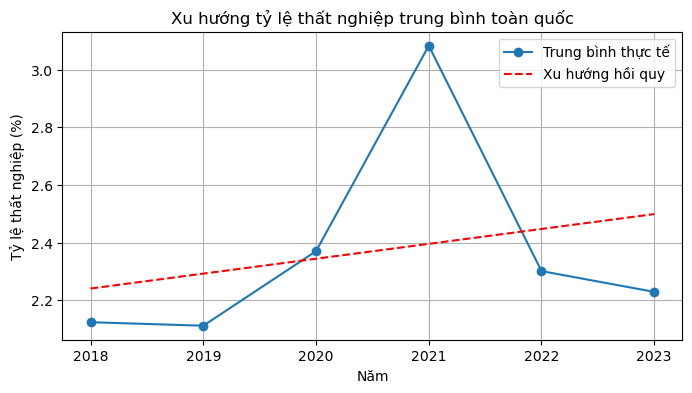

In [12]:
# Vẽ biểu đồ thực tế và đường hồi quy
plt.figure(figsize=(8,4))
plt.plot(avg_national['Year'], avg_national['Unemployment_Rate'], marker='o', label='Trung bình thực tế')
plt.plot(avg_national['Year'], model.predict(X), color='red', linestyle='--', label='Xu hướng hồi quy')
plt.title('Xu hướng tỷ lệ thất nghiệp trung bình toàn quốc')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ thất nghiệp (%)')
plt.legend()
plt.grid(True)
plt.savefig('../output/unemployment_trend_regression.png', bbox_inches='tight')
plt.show()

In [16]:
# Lưu các bảng phân tích ra file CSV
avg_by_province.to_csv('../output/avg_by_province.csv')
max_by_year.to_csv('../output/max_by_year.csv')
min_by_year.to_csv('../output/min_by_year.csv')
avg_by_year.to_csv('../output/avg_by_year.csv')